In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np
#t-test
from scipy.stats import ttest_ind
import pymannkendall as mk

#Dataset

In [2]:
data = pd.read_excel("Data.xlsx")

**Detailed process of merging the Files**


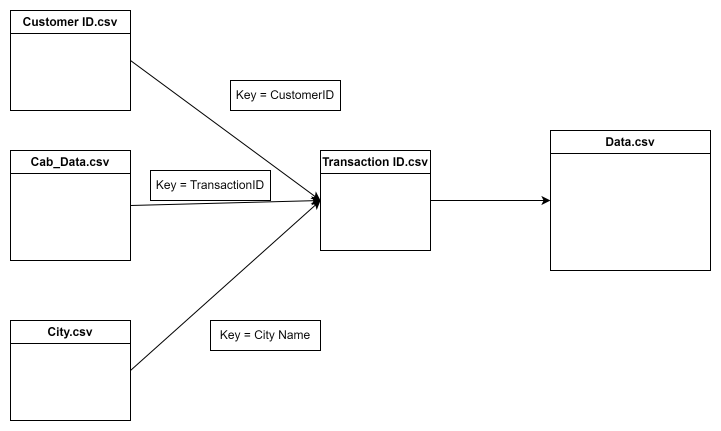

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Transaction ID               440098 non-null  int64         
 1   Customer ID                  440098 non-null  int64         
 2   Payment_Mode                 440098 non-null  object        
 3   Customer Gender              440098 non-null  object        
 4   Customer Age                 440098 non-null  int64         
 5   Customer Income (USD/Month)  440098 non-null  int64         
 6   Date of Travel               359392 non-null  datetime64[ns]
 7   Cab Company                  359392 non-null  object        
 8   City                         359392 non-null  object        
 9   Distance Travelled(KM)       359392 non-null  float64       
 10  Price Charged (USD)          359392 non-null  float64       
 11  Cost of Trip (USD)        

#Data Cleaning

In [4]:
data = data.dropna(subset=["Cab Company"])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359392 entries, 0 to 440096
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Transaction ID               359392 non-null  int64         
 1   Customer ID                  359392 non-null  int64         
 2   Payment_Mode                 359392 non-null  object        
 3   Customer Gender              359392 non-null  object        
 4   Customer Age                 359392 non-null  int64         
 5   Customer Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel               359392 non-null  datetime64[ns]
 7   Cab Company                  359392 non-null  object        
 8   City                         359392 non-null  object        
 9   Distance Travelled(KM)       359392 non-null  float64       
 10  Price Charged (USD)          359392 non-null  float64       
 11  Cost of Trip (USD)           35

**We have Dropped the NaN values and now we have the complete data**

In [6]:
data['day'] = data['Date of Travel'].dt.day
data['month'] = data['Date of Travel'].dt.month
data['year'] = data['Date of Travel'].dt.year

In [7]:
data.head()

Transaction ID  Customer ID Payment_Mode Customer Gender  Customer Age  \
0        10000011        29290         Card            Male            28   
1        10000012        27703         Card            Male            27   
2        10000013        28712         Cash            Male            53   
3        10000014        28020         Cash            Male            23   
4        10000015        27182         Card            Male            33   

   Customer Income (USD/Month) Date of Travel Cab Company        City  \
0                        10813     2016-01-08    Pink Cab  ATLANTA GA   
1                         9237     2016-01-06    Pink Cab  ATLANTA GA   
2                        11242     2016-01-02    Pink Cab  ATLANTA GA   
3                        23327     2016-01-07    Pink Cab  ATLANTA GA   
4                         8536     2016-01-03    Pink Cab  ATLANTA GA   

   Distance Travelled(KM)  ...  Cost of Trip (USD)  City Population  \
0                   30.45  ...             313.635         814885.0   
1                   28.62  ...             334.854         814885.0   
2                    9.04  ...              97.632         814885.0   
3                   33.17  ...             351.602         814885.0   
4                    8.73  ...              97.776         814885.0   

   City Users  Profit  Profit per KM  Percentage of Users  Quarter day  month  \
0     24701.0  57.315       1.882266             0.030312       Q1   8      1   
1     24701.0  23.666       0.826904             0.030312       Q1   6      1   
2     24701.0  27.568       3.049558             0.030312       Q1   2      1   
3     24701.0  25.798       0.777751             0.030312       Q1   7      1   
4     24701.0  16.844       1.929439             0.030312       Q1   3      1   

   year  
0  2016  
1  2016  
2  2016  
3  2016  
4  2016  

[5 rows x 21 columns]

#EDA

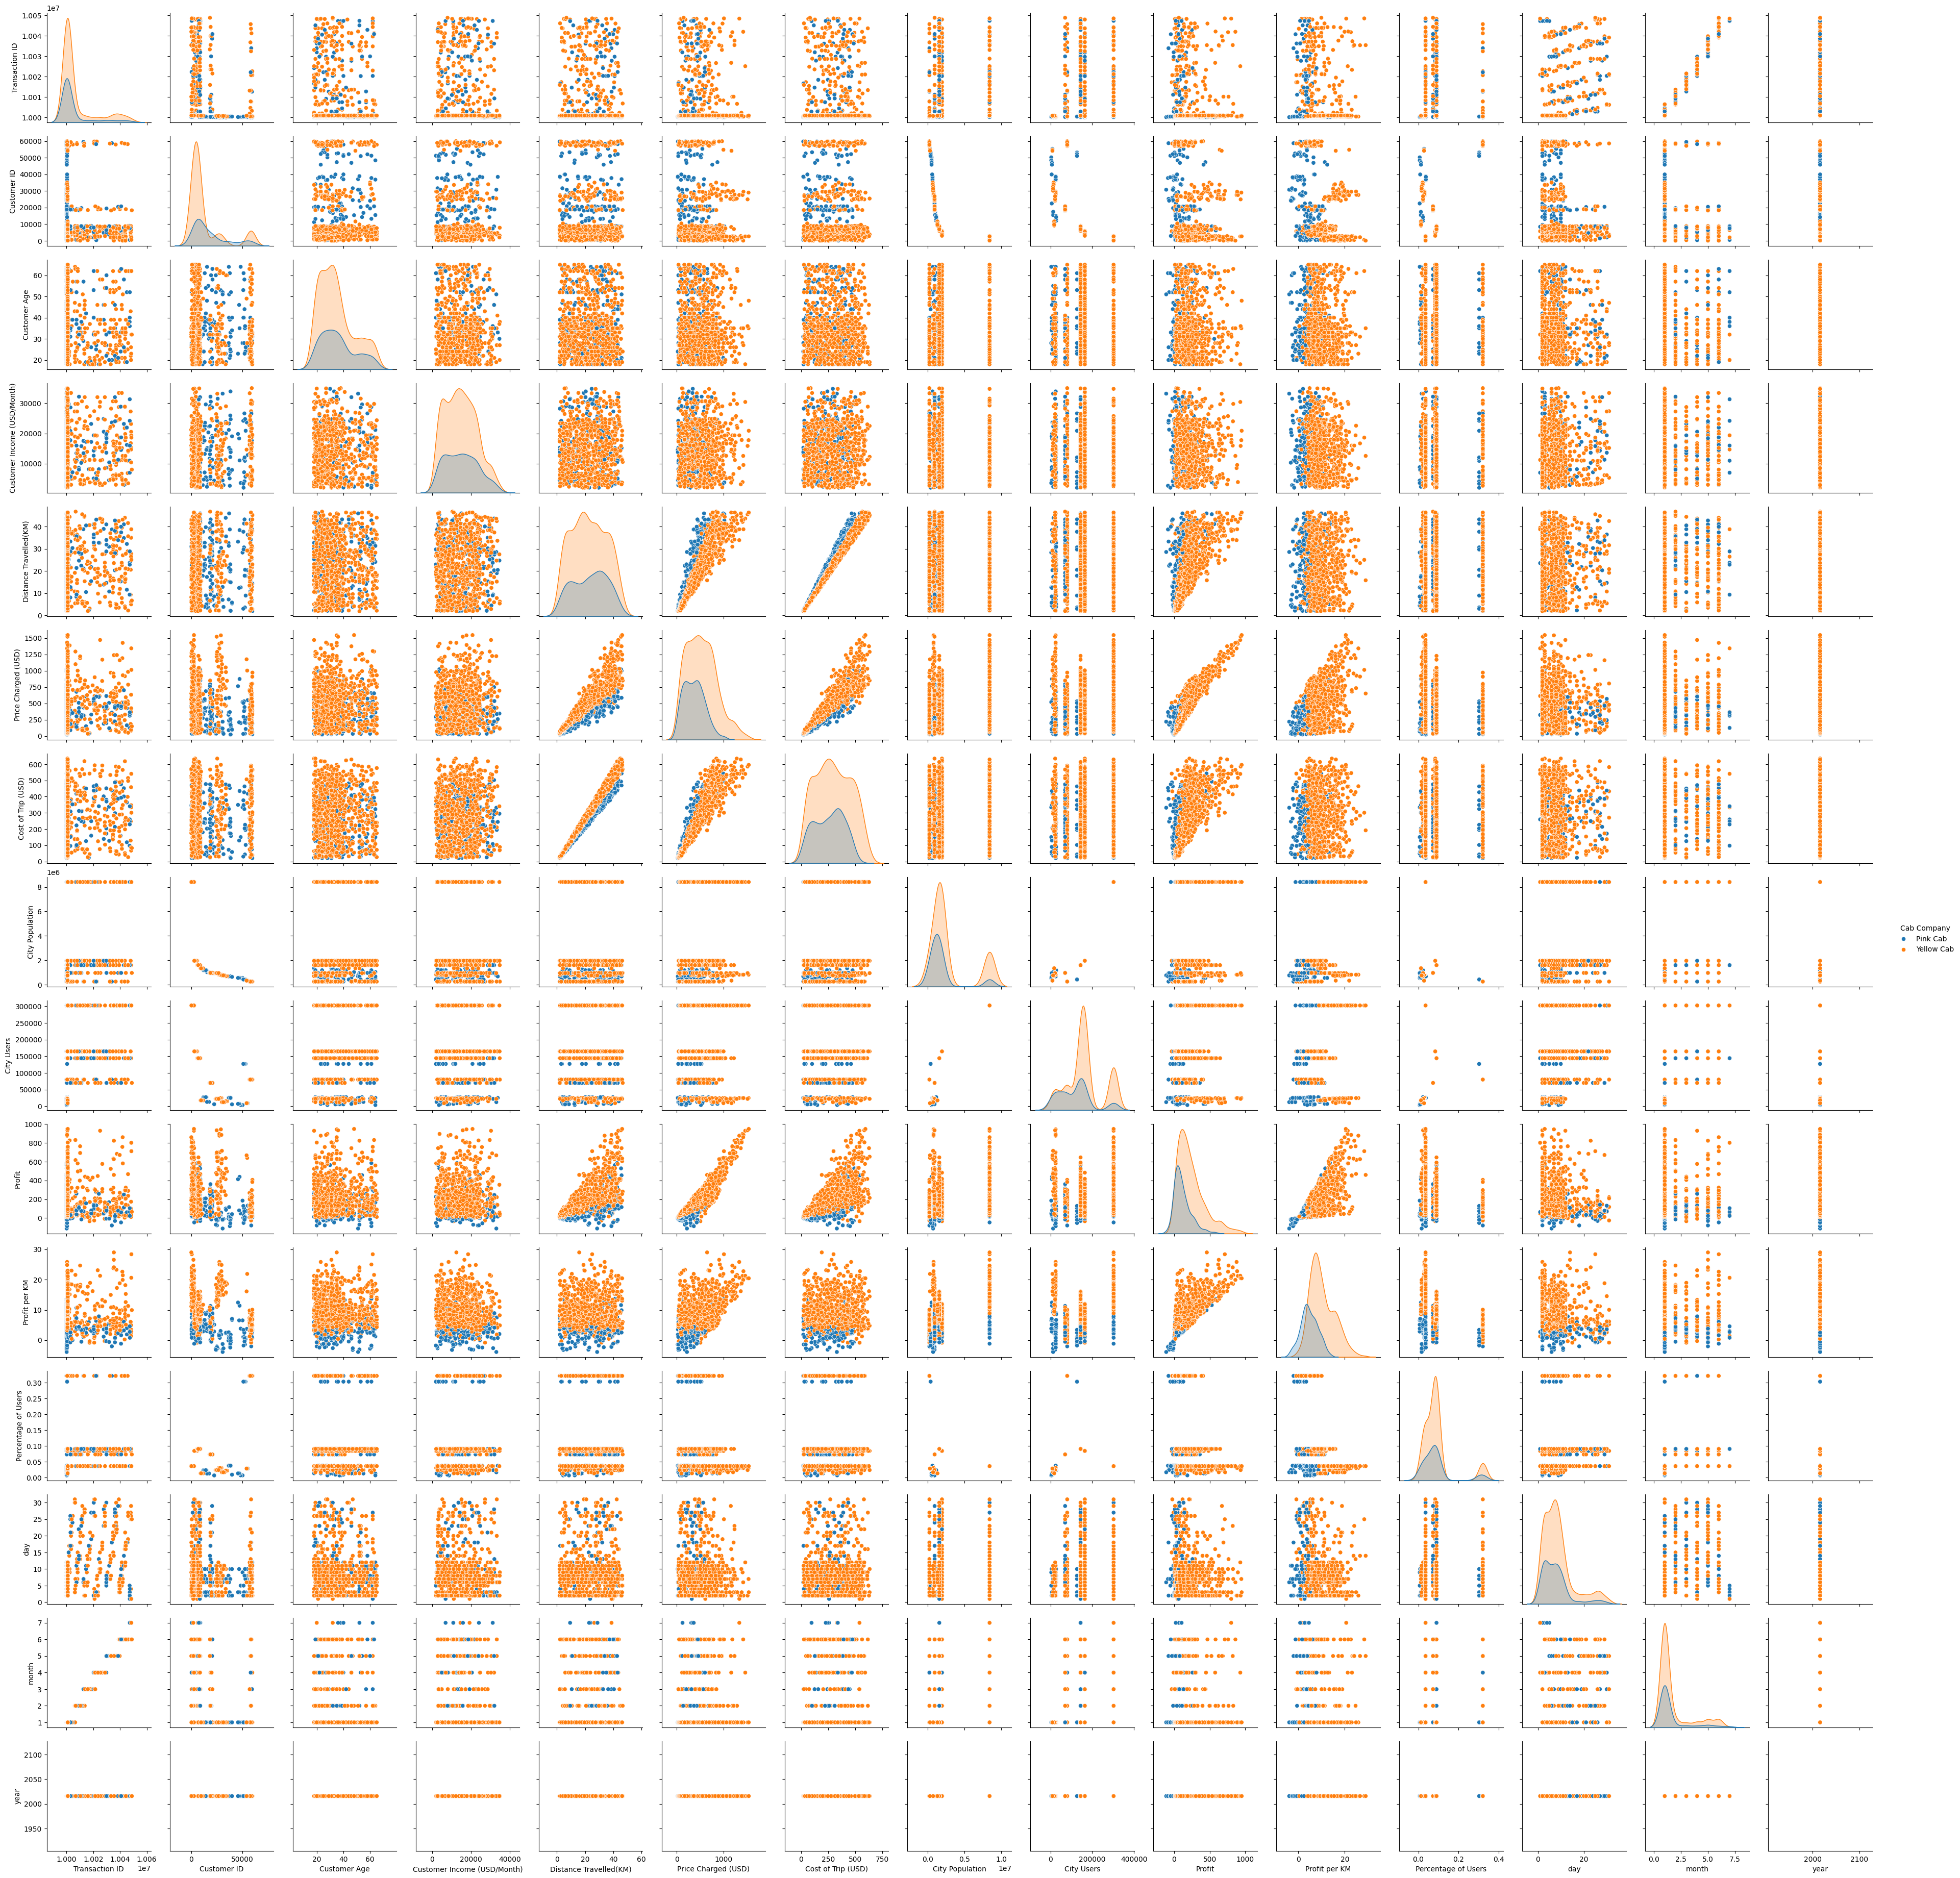

In [8]:
sns.pairplot(data.head(1000), hue = 'Cab Company')

In [9]:
data_corr = data.corr(numeric_only=True)
data_corr

Transaction ID  Customer ID  Customer Age  \
Transaction ID                     1.000000    -0.016912     -0.001267   
Customer ID                       -0.016912     1.000000     -0.004735   
Customer Age                      -0.001267    -0.004735      1.000000   
Customer Income (USD/Month)       -0.001570    -0.013608      0.003907   
Distance Travelled(KM)            -0.001429     0.000389     -0.000369   
Price Charged (USD)               -0.052902    -0.177324     -0.003084   
Cost of Trip (USD)                -0.003462     0.003077     -0.000189   
City Population                    0.023868    -0.647052     -0.009002   
City Users                         0.013526    -0.610742     -0.005906   
Profit                            -0.087130    -0.306527     -0.005093   
Profit per KM                     -0.110524    -0.394133     -0.006428   
Percentage of Users               -0.022612     0.805490     -0.001778   
day                                0.012021     0.000650     -0.001275   
month                              0.287009    -0.044656     -0.002226   
year                               0.941600    -0.002539     -0.000579   

                             Customer Income (USD/Month)  \
Transaction ID                                 -0.001570   
Customer ID                                    -0.013608   
Customer Age                                    0.003907   
Customer Income (USD/Month)                     1.000000   
Distance Travelled(KM)                         -0.000544   
Price Charged (USD)                             0.003228   
Cost of Trip (USD)                             -0.000633   
City Population                                 0.011868   
City Users                                      0.010464   
Profit                                          0.006148   
Profit per KM                                   0.008159   
Percentage of Users                            -0.009332   
day                                             0.001860   
month                                           0.000322   
year                                           -0.001617   

                             Distance Travelled(KM)  Price Charged (USD)  \
Transaction ID                            -0.001429            -0.052902   
Customer ID                                0.000389            -0.177324   
Customer Age                              -0.000369            -0.003084   
Customer Income (USD/Month)               -0.000544             0.003228   
Distance Travelled(KM)                     1.000000             0.835753   
Price Charged (USD)                        0.835753             1.000000   
Cost of Trip (USD)                         0.981848             0.859812   
City Population                           -0.002311             0.326589   
City Users                                -0.000428             0.281061   
Profit                                     0.462768             0.864154   
Profit per KM                             -0.000538             0.473222   
Percentage of Users                        0.002305            -0.150070   
day                                        0.001652            -0.004021   
month                                     -0.001903            -0.061116   
year                                      -0.001072            -0.036409   

                             Cost of Trip (USD)  City Population  City Users  \
Transaction ID                        -0.003462         0.023868    0.013526   
Customer ID                            0.003077        -0.647052   -0.610742   
Customer Age                          -0.000189        -0.009002   -0.005906   
Customer Income (USD/Month)           -0.000633         0.011868    0.010464   
Distance Travelled(KM)                 0.981848        -0.002311   -0.000428   
Price Charged (USD)                    0.859812         0.326589    0.281061   
Cost of Trip (USD)                     1.000000         0.015108    0.023628   
City Population           

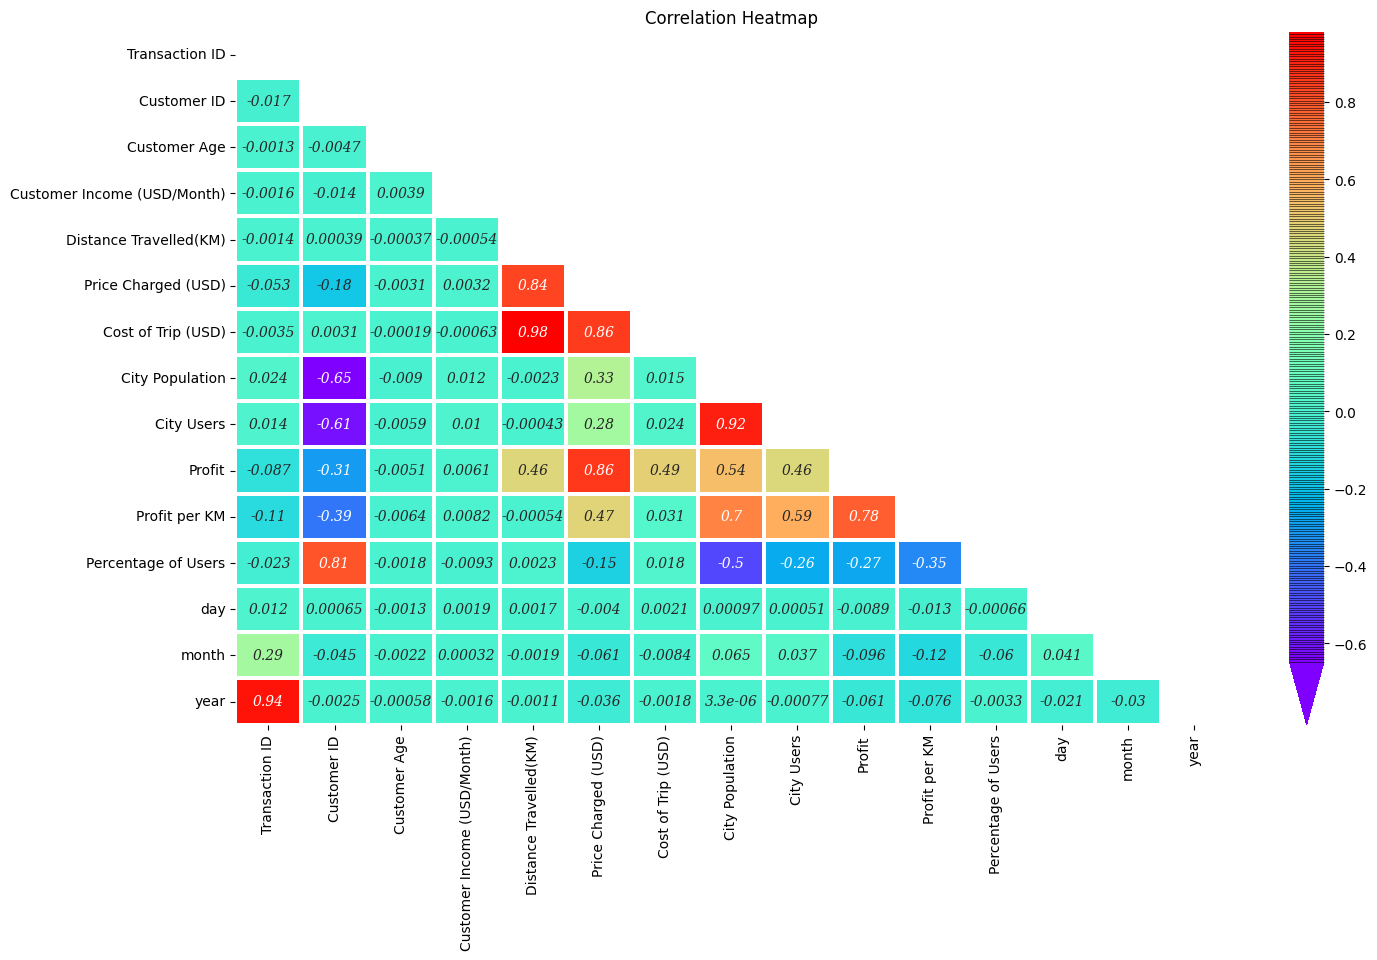

In [10]:
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font
           'fontfamily': 'serif',              # To change the family of font
           'alpha':1 }                         # To change the transparency of the text


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(data_corr)

# Generate heatmap correlation
ax = sns.heatmap(data_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap')

# Set the size of text
sns.set(font_scale = 1.2)

<ipython-input-11-58edd2646ef8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels = plot.get_xticklabels(),rotation=90)


[Text(2015.75, 0, '2015.75'),
 Text(2016.0, 0, '2016.00'),
 Text(2016.25, 0, '2016.25'),
 Text(2016.5, 0, '2016.50'),
 Text(2016.75, 0, '2016.75'),
 Text(2017.0, 0, '2017.00'),
 Text(2017.25, 0, '2017.25'),
 Text(2017.5, 0, '2017.50'),
 Text(2017.75, 0, '2017.75'),
 Text(2018.0, 0, '2018.00'),
 Text(2018.25, 0, '2018.25')]

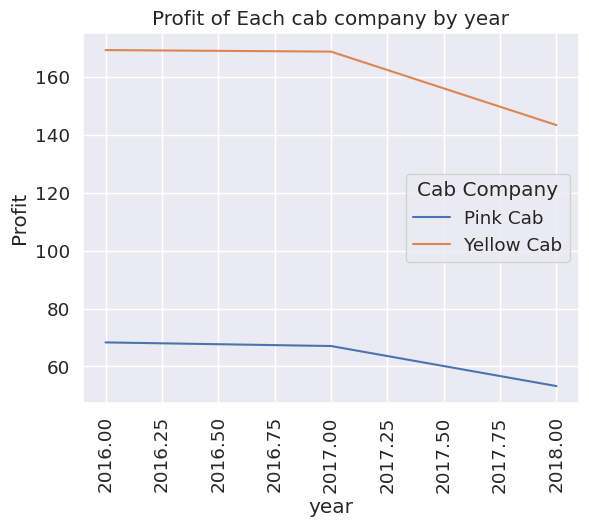

In [11]:
data_grouped = data.groupby(['year', 'Cab Company'])['Profit'].mean().reset_index()

plot = sns.lineplot(data=data_grouped, x='year', y='Profit', hue='Cab Company')
plot.set_title("Profit of Each cab company by year")
plot.set_xticklabels(labels = plot.get_xticklabels(),rotation=90)

Text(0, 0.5, 'Frequency')

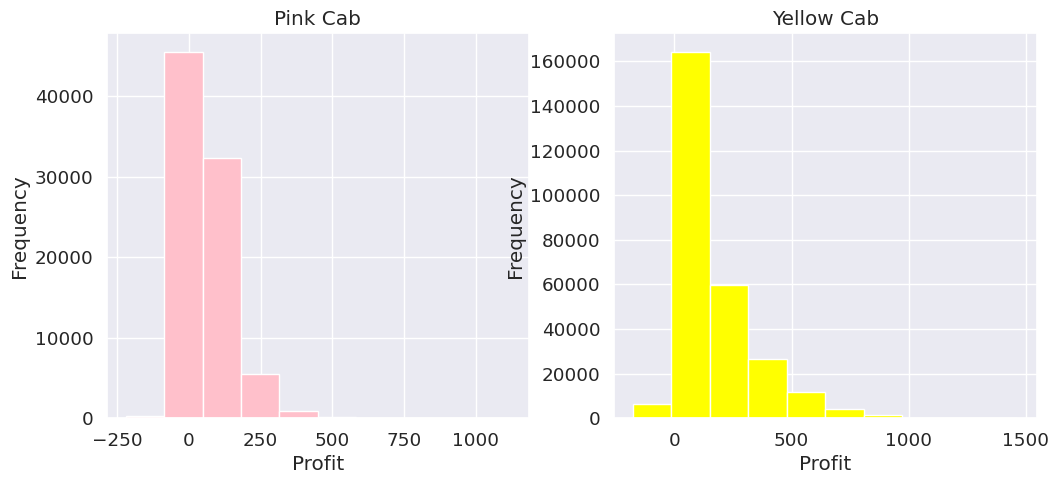

In [12]:
pink_data = data[data['Cab Company'] == 'Pink Cab']
yellow_data = data[data['Cab Company'] == 'Yellow Cab']

fig, (plt1, plt2) = plt.subplots(ncols=2, figsize=(12, 5))
plt1.hist(pink_data['Profit'], bins=10, color='pink')
plt1.set_title('Pink Cab')
plt1.set_xlabel('Profit')
plt1.set_ylabel('Frequency')
plt2.hist(yellow_data['Profit'], bins=10, color='yellow')
plt2.set_title('Yellow Cab')
plt2.set_xlabel('Profit')
plt2.set_ylabel('Frequency')

In [13]:
data_grouped_2 = data.groupby(['City', 'Cab Company'])['Profit'].sum().reset_index()
data_grouped_2.head()

City Cab Company       Profit
0  ATLANTA GA    Pink Cab   96050.0760
1  ATLANTA GA  Yellow Cab  746382.8056
2   AUSTIN TX    Pink Cab  147445.2900
3   AUSTIN TX  Yellow Cab  379255.7352
4   BOSTON MA    Pink Cab  262001.6980

<ipython-input-14-aa903ea29d5b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie1['Profit Percentage'] = (pie1['Profit'] / total_profit) * 100


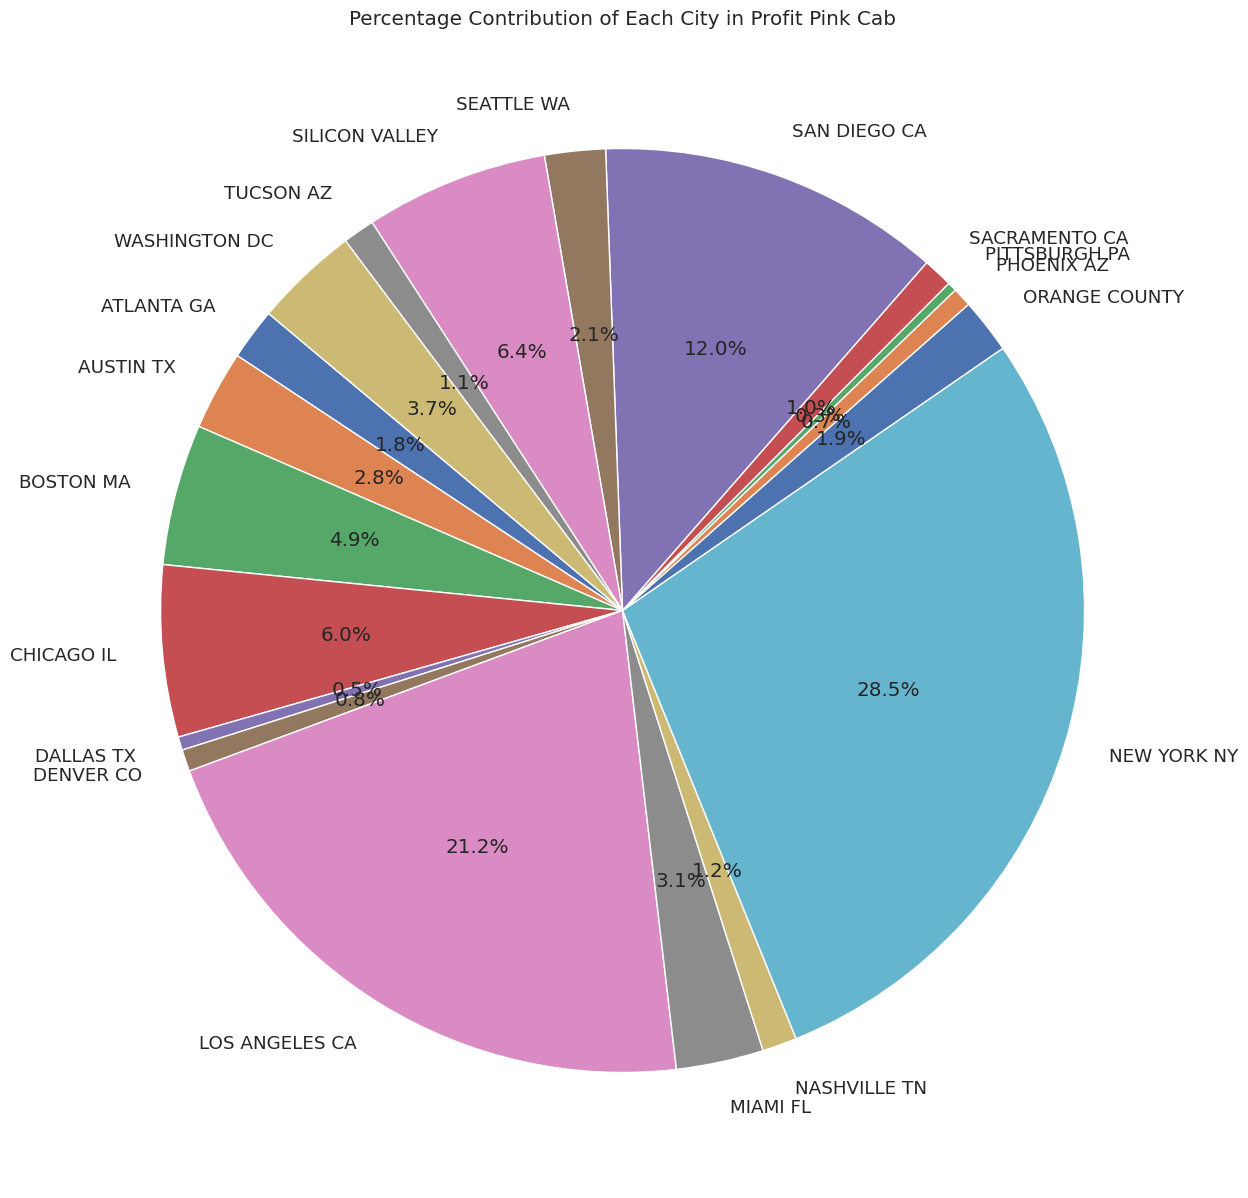

<ipython-input-14-aa903ea29d5b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie2['Profit Percentage'] = (pie2['Profit'] / total_profit) * 100


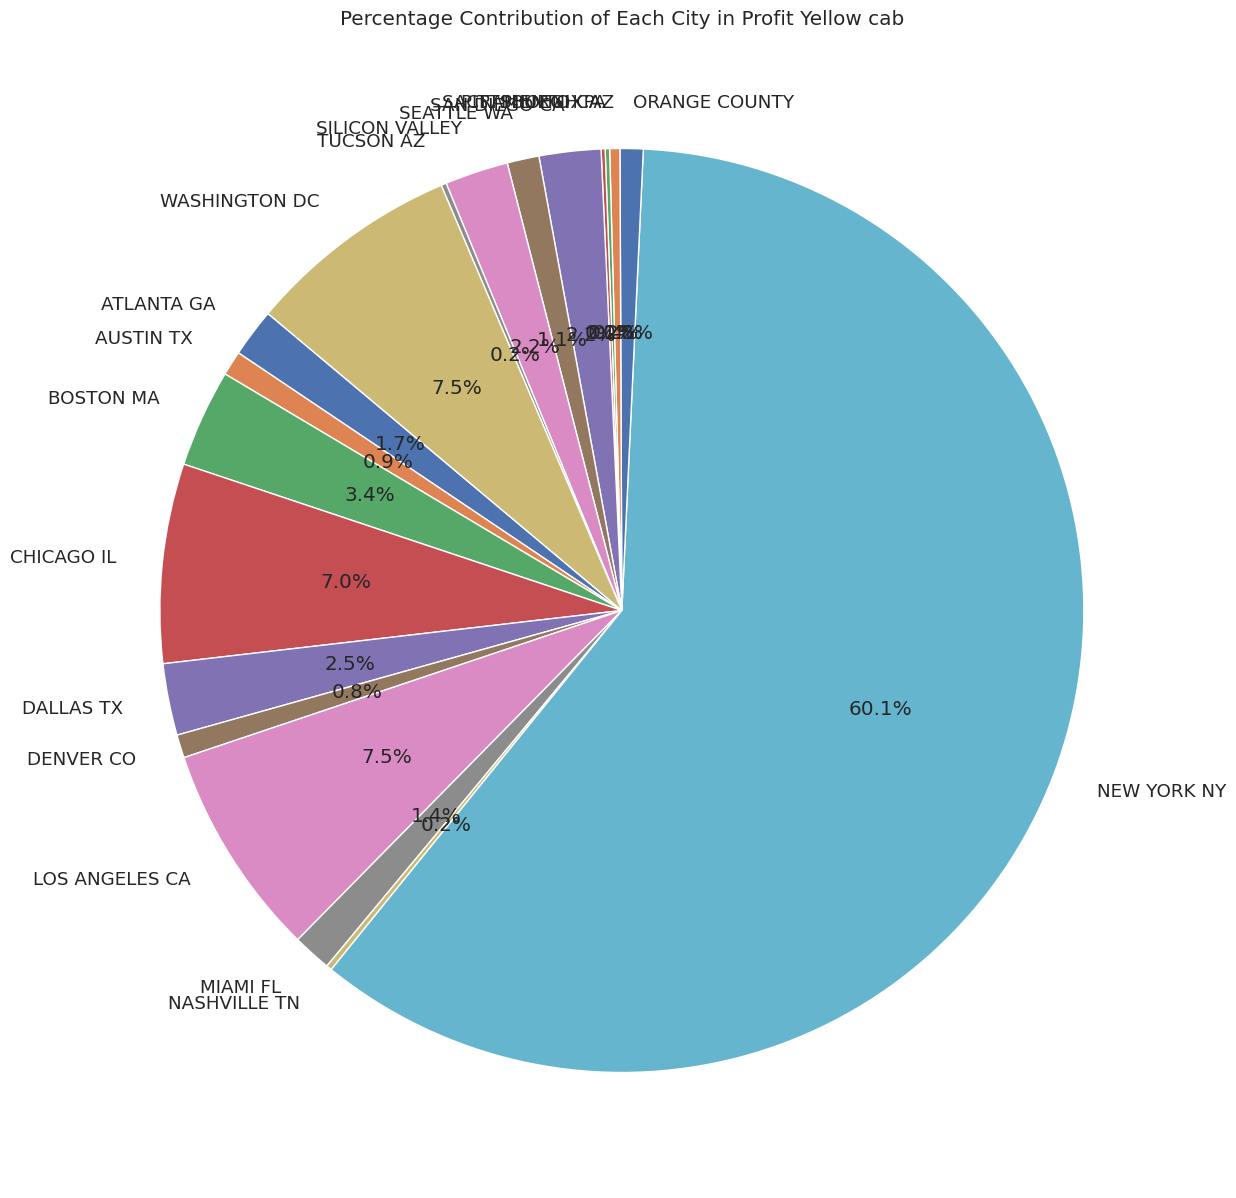

In [14]:
pie1 = data_grouped_2[data_grouped_2['Cab Company']=='Pink Cab']
pie2 = data_grouped_2[data_grouped_2['Cab Company']=='Yellow Cab']

total_profit = pie1['Profit'].sum()

pie1['Profit Percentage'] = (pie1['Profit'] / total_profit) * 100

plt.figure(figsize=(15, 15))
plt.pie(pie1['Profit Percentage'], labels=pie1['City'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Contribution of Each City in Profit Pink Cab')
plt.show()

total_profit = pie2['Profit'].sum()

pie2['Profit Percentage'] = (pie2['Profit'] / total_profit) * 100
plt.figure(figsize=(15, 15))
plt.pie(pie2['Profit Percentage'], labels=pie2['City'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Contribution of Each City in Profit Yellow cab')
plt.show()

In [15]:
data_grouped_3 = data.groupby(['year', 'Cab Company'])['Customer ID'].count().reset_index()
data_grouped_3 = data_grouped_3.rename(columns={"Customer ID": "Count of Customers"})
data_grouped_3

year Cab Company  Count of Customers
0  2016    Pink Cab               25080
1  2016  Yellow Cab               82239
2  2017    Pink Cab               30321
3  2017  Yellow Cab               98189
4  2018    Pink Cab               29310
5  2018  Yellow Cab               94253

<ipython-input-16-43860b17d043>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels = plot.get_xticklabels(),rotation=90)


[Text(2015.75, 0, '2015.75'),
 Text(2016.0, 0, '2016.00'),
 Text(2016.25, 0, '2016.25'),
 Text(2016.5, 0, '2016.50'),
 Text(2016.75, 0, '2016.75'),
 Text(2017.0, 0, '2017.00'),
 Text(2017.25, 0, '2017.25'),
 Text(2017.5, 0, '2017.50'),
 Text(2017.75, 0, '2017.75'),
 Text(2018.0, 0, '2018.00'),
 Text(2018.25, 0, '2018.25')]

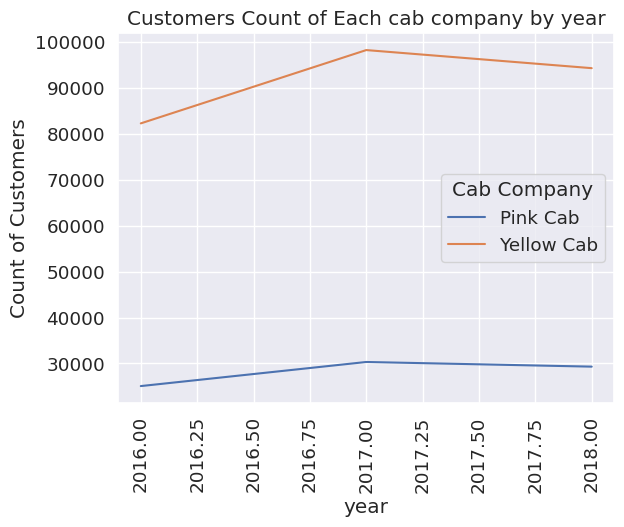

In [16]:
plot = sns.lineplot(data=data_grouped_3, x='year', y='Count of Customers', hue='Cab Company')
plot.set_title("Customers Count of Each cab company by year")
plot.set_xticklabels(labels = plot.get_xticklabels(),rotation=90)

In [17]:
data_grouped_4 = data.groupby(['Cab Company', 'Customer ID'])['year'].nunique().reset_index()
data_grouped_4 = data_grouped_4.rename(columns={"year": "No. of years customer for"})
data_grouped_4

Cab Company  Customer ID  No. of years customer for
0        Pink Cab            1                          2
1        Pink Cab            2                          3
2        Pink Cab            3                          3
3        Pink Cab            4                          1
4        Pink Cab            5                          3
...           ...          ...                        ...
72221  Yellow Cab        59996                          2
72222  Yellow Cab        59997                          2
72223  Yellow Cab        59998                          3
72224  Yellow Cab        59999                          2
72225  Yellow Cab        60000                          3

[72226 rows x 3 columns]

In [18]:
retained_customers = data.groupby(['Cab Company', 'Customer ID'])['year'].nunique()
retained_counts = retained_customers.groupby('Cab Company').apply(lambda x: sum(x == 3)).reset_index()
lost_counts = retained_customers.groupby('Cab Company').apply(lambda x: sum(x < 3)).reset_index()

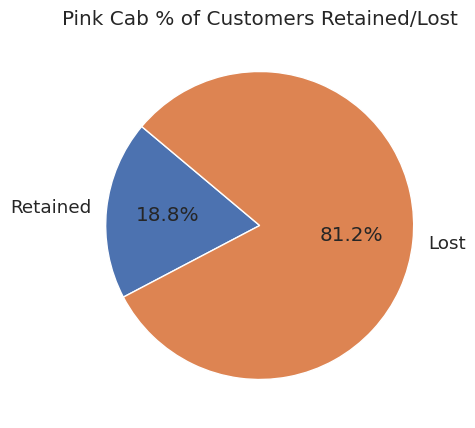

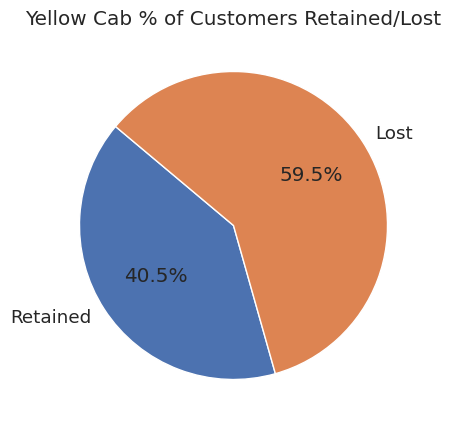

In [19]:
plt.figure(figsize=(5, 5))
plt.pie([6082,26248], labels=['Retained', 'Lost'], autopct='%1.1f%%', startangle=140)
plt.title('Pink Cab % of Customers Retained/Lost')
plt.show()

plt.figure(figsize=(5, 5))
plt.pie([16156,23740], labels=['Retained', 'Lost'], autopct='%1.1f%%', startangle=140)
plt.title('Yellow Cab % of Customers Retained/Lost')
plt.show()

In [20]:
data_grouped_5 = data.groupby(['Cab Company','year','Quarter'])['Profit'].sum().reset_index()
data_grouped_5['Profit'] = data_grouped_5['Profit'].astype('int64')
data_grouped_5

Cab Company  year Quarter   Profit
0     Pink Cab  2016      Q1   249229
1     Pink Cab  2016      Q2   215246
2     Pink Cab  2016      Q3   381375
3     Pink Cab  2016      Q4   867660
4     Pink Cab  2017      Q1   358923
5     Pink Cab  2017      Q2   256717
6     Pink Cab  2017      Q3   466195
7     Pink Cab  2017      Q4   951819
8     Pink Cab  2018      Q1   331039
9     Pink Cab  2018      Q2   175183
10    Pink Cab  2018      Q3   337000
11    Pink Cab  2018      Q4   716937
12  Yellow Cab  2016      Q1  2760242
13  Yellow Cab  2016      Q2  3479801
14  Yellow Cab  2016      Q3  3197747
15  Yellow Cab  2016      Q4  4489203
16  Yellow Cab  2017      Q1  3602691
17  Yellow Cab  2017      Q2  3924204
18  Yellow Cab  2017      Q3  3760758
19  Yellow Cab  2017      Q4  5288324
20  Yellow Cab  2018      Q1  3122695
21  Yellow Cab  2018      Q2  3235419
22  Yellow Cab  2018      Q3  2901708
23  Yellow Cab  2018      Q4  4257575

In [21]:
data2k16 = data_grouped_5[data_grouped_5['year'] == 2016]
data2k17 = data_grouped_5[data_grouped_5['year'] == 2017]
data2k18 = data_grouped_5[data_grouped_5['year'] == 2018]

Text(0.5, 1.0, '2018')

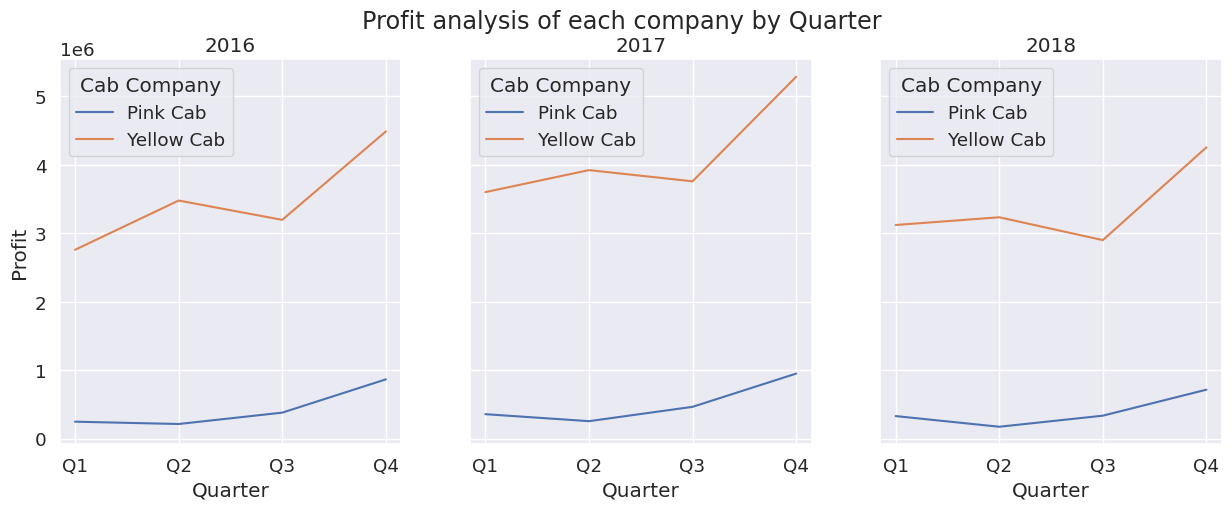

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Profit analysis of each company by Quarter')

sns.lineplot(ax = axes[0], data=data2k16, x='Quarter', y='Profit', hue='Cab Company')
axes[0].set_title("2016")

sns.lineplot(ax = axes[1], data=data2k17, x='Quarter', y='Profit', hue='Cab Company')
axes[1].set_title("2017")

sns.lineplot(ax = axes[2], data=data2k18, x='Quarter', y='Profit', hue='Cab Company')
axes[2].set_title("2018")

In [23]:
data_grouped_6 = data[['Cab Company','City','Percentage of Users']]
data_grouped_6 = data_grouped_6.drop_duplicates()
data_grouped_6

Cab Company            City  Percentage of Users
0       Pink Cab      ATLANTA GA             0.030312
6       Pink Cab       AUSTIN TX             0.021447
8       Pink Cab       BOSTON MA             0.321411
9     Yellow Cab       BOSTON MA             0.321411
33      Pink Cab      CHICAGO IL             0.084121
60    Yellow Cab      CHICAGO IL             0.084121
81      Pink Cab       DALLAS TX             0.023499
91      Pink Cab       DENVER CO             0.016468
99      Pink Cab  LOS ANGELES CA             0.090363
197     Pink Cab        MIAMI FL             0.013199
202     Pink Cab    NASHVILLE TN             0.028329
205     Pink Cab     NEW YORK NY             0.035945
222   Yellow Cab  LOS ANGELES CA             0.090363
227     Pink Cab   ORANGE COUNTY             0.012613
236     Pink Cab      PHOENIX AZ             0.006497
239     Pink Cab   PITTSBURGH PA             0.006720
243     Pink Cab   SACRAMENTO CA             0.012906
247     Pink Cab    SAN DIEGO CA             0.072964
300     Pink Cab      SEATTLE WA             0.037338
324     Pink Cab  SILICON VALLEY             0.023138
344     Pink Cab       TUCSON AZ             0.009046
347     Pink Cab   WASHINGTON DC             0.303207
366   Yellow Cab      ATLANTA GA             0.030312
405   Yellow Cab       AUSTIN TX             0.021447
465   Yellow Cab     NEW YORK NY             0.035945
610   Yellow Cab    SAN DIEGO CA             0.072964
810   Yellow Cab       DALLAS TX             0.023499
864   Yellow Cab       DENVER CO             0.016468
1093  Yellow Cab        MIAMI FL             0.013199
1103  Yellow Cab    NASHVILLE TN             0.028329
1509  Yellow Cab   ORANGE COUNTY             0.012613
1521  Yellow Cab      PHOENIX AZ             0.006497
1529  Yellow Cab   PITTSBURGH PA             0.006720
1533  Yellow Cab   SACRAMENTO CA             0.012906
1623  Yellow Cab      SEATTLE WA             0.037338
1671  Yellow Cab  SILICON VALLEY             0.023138
1701  Yellow Cab       TUCSON AZ             0.009046
1707  Yellow Cab   WASHINGTON DC             0.303207

In [24]:
chart = alt.Chart().mark_bar().encode(
    x=alt.X('City', sort=alt.EncodingSortField('Percentage of Users', order='descending')),
    y='Percentage of Users',
    color='Cab Company'
)
text=alt.Chart().mark_text(align='center', baseline='middle').encode(
    y=alt.Y('Percentage of Users', title=None),
    x='City',
    text='Percentage of Users')

alt.layer(chart, text, data=data_grouped_6)

alt.LayerChart(...)

##Hypothesis 1

**Hypothesis 1**

H0 : There is no relationship between the year and the profits occured during that year

H1 : There is a relationship between the year and the profits occured during that year

In [25]:
pink_2k16_data = data[(data['Cab Company']=='Pink Cab') & (data['year'] == 2016)].groupby('Transaction ID').Profit.mean()
pink_2k17_data = data[(data['Cab Company']=='Pink Cab') & (data['year'] == 2017)].groupby('Transaction ID').Profit.mean()

_, p_value = ttest_ind(pink_2k16_data.values,
                             pink_2k17_data.values,
                             equal_var=True)

print('P value = ', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

yellow_2k16_data = data[(data['Cab Company']=='Yellow Cab') & (data['year'] == 2016)].groupby('Transaction ID').Profit.mean()
yellow_2k17_data = data[(data['Cab Company']=='Yellow Cab') & (data['year'] == 2017)].groupby('Transaction ID').Profit.mean()

_, p_value = ttest_ind(yellow_2k16_data.values,
                             yellow_2k17_data.values,
                             equal_var=True)

print('P value = ', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

P value =  0.07904592042061757
Reject Alternative Hypothesis(H1)
P value =  0.530604900882911
Reject Alternative Hypothesis(H1)


##Hypothesis 2

**Hypothesis 2**

H0 : Age has no effect on company profit

H1 : Age has effect on company profit

In [26]:
agg_dict = {
    'Profit': 'mean'
}
age_group_1 = data.groupby((data['Customer Age'] <= 50)&(data['Cab Company']=='Pink Cab')).agg(agg_dict)
age_group_2 = data.groupby((data['Customer Age'] > 50)&(data['Cab Company']=='Pink Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(age_group_1 , age_group_2, equal_var=True)

print('P value = ', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")
agg_dict = {
    'Profit': 'mean'
}
age_group_1 = data.groupby((data['Customer Age'] <= 50)&(data['Cab Company']=='Yellow Cab')).agg(agg_dict)
age_group_2 = data.groupby((data['Customer Age'] > 50)&(data['Cab Company']=='Yellow Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(age_group_1 , age_group_2, equal_var=True)

print('P value = ', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

P value =  [0.90608835]
Reject Alternative Hypothesis(H1)
P value =  [0.66456451]
Reject Alternative Hypothesis(H1)


##Hypothesis 3

**Hypothesis 3**

H0 : Locality has no effect on company profit

H1 : Locality has effect on company profit

In [27]:
agg_dict = {
    'Profit': 'mean'
}
city_group_1 = data[(data['Cab Company']=='Pink Cab') & (data['City'] == 'NEW YORK NY')].groupby('Transaction ID').Profit.mean()
city_group_2 = data[(data['Cab Company']=='Pink Cab') & (data['City'] == 'LOS ANGELES CA')].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(city_group_1 , city_group_2, equal_var=True)

print('P value = ', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'
}
city_group_1 = data[(data['Cab Company']=='Yellow Cab') & (data['City'] == 'NEW YORK NY')].groupby('Transaction ID').Profit.mean()
city_group_2 = data[(data['Cab Company']=='Yellow Cab') & (data['City'] == 'LOS ANGELES CA')].groupby('Transaction ID').Profit.mean()
t_stat,p_value=ttest_ind(city_group_1 , city_group_2, equal_var=True)

print('P value = ', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

P value =  0.0
Reject Null Hypothesis (H0)
P value =  0.0
Reject Null Hypothesis (H0)


##Hypothesis 4

**Hypothesis 4**

H0 : There is relation between quarter and the number of customers using the taxi service.

H1 : There is no relation between quarter and the number of customers using the taxi service.

In [28]:
customer_data = data.groupby('Quarter')['Customer ID'].count().reset_index()

In [29]:
customer_data['Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'],
                        [1,2,3,4], inplace=True)
customer_data

Quarter  Customer ID
0        1        63127
1        2        69848
2        3        95858
3        4       130559

In [30]:
p_value = mk.seasonal_test(customer_data,period=4).p

print('P value = ', p_value)
if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

P value =  0.008239018825724642
Reject Null Hypothesis (H0)


##Hypothesis 5

In [31]:
agg_dict = {
    'Profit': 'mean'
}
payment_group1 = data.groupby((data.Payment_Mode=='Cash')&(data['Cab Company']=='Pink Cab')).agg(agg_dict)
payment_group2 = data.groupby((data.Payment_Mode=='Card')&(data['Cab Company']=='Pink Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(payment_group1 , payment_group2, equal_var=True)

print('P value = ', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'
}
payment_group1 = data.groupby((data.Payment_Mode=='Cash')&(data['Cab Company']=='Yellow Cab')).agg(agg_dict)
payment_group2 = data.groupby((data.Payment_Mode=='Card')&(data['Cab Company']=='Yellow Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(payment_group1 , payment_group2, equal_var=True)

print('P value = ', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


P value =  [0.97289731]
Reject Alternative Hypothesis(H1)
P value =  [0.8746019]
Reject Alternative Hypothesis(H1)
